In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
ratings = pd.read_csv('./datasets/ratings.csv')

In [42]:
ratings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [43]:
movies = pd.read_csv('./datasets/movies.csv')

In [44]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [45]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [46]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [47]:
movies.title.value_counts()

War of the Worlds (2005)                  2
Emma (1996)                               2
Confessions of a Dangerous Mind (2002)    2
Saturn 3 (1980)                           2
Eros (2004)                               2
                                         ..
Fighting Seabees, The (1944)              1
Old School (2003)                         1
Zombie Strippers! (2008)                  1
King of Hearts (1966)                     1
Maltese Falcon, The (1941)                1
Name: title, Length: 9737, dtype: int64

In [48]:
duplicated_titles = movies.title.duplicated()

In [49]:
movies[duplicated_titles]

movieId                                   title  \
5601    26958                             Emma (1996)   
6932    64997                War of the Worlds (2005)   
9106   144606  Confessions of a Dangerous Mind (2002)   
9135   147002                             Eros (2004)   
9468   168358                         Saturn 3 (1980)   

                                   genres  
5601                              Romance  
6932                        Action|Sci-Fi  
9106  Comedy|Crime|Drama|Romance|Thriller  
9135                        Drama|Romance  
9468                      Sci-Fi|Thriller

In [50]:
emma_movie_title = movies.title.str.lower().str.contains('eros')
movies[emma_movie_title]

movieId                         title                      genres
782      1024  Three Caballeros, The (1945)  Animation|Children|Musical
5854    32600                   Eros (2004)                       Drama
8866   133780                 Güeros (2014)                Comedy|Drama
9135   147002                   Eros (2004)               Drama|Romance

In [51]:
duplicated_movie_ids = movies[duplicated_titles].movieId.values

In [52]:
duplicated_movie_ids

array([ 26958,  64997, 144606, 147002, 168358])

In [13]:
movies = movies[~movies.movieId.isin(duplicated_movie_ids)]

In [14]:
ratings = ratings[~ratings.movieId.isin(duplicated_movie_ids)]

In [15]:
movies_rating = ratings.merge(movies, on='movieId', how='left' )

In [55]:
movies_rating

userId  movieId  rating   timestamp                           title  \
0            1        1     4.0   964982703                Toy Story (1995)   
1            1        3     4.0   964981247         Grumpier Old Men (1995)   
2            1        6     4.0   964982224                     Heat (1995)   
3            1       47     5.0   964983815     Seven (a.k.a. Se7en) (1995)   
4            1       50     5.0   964982931      Usual Suspects, The (1995)   
...        ...      ...     ...         ...                             ...   
100825     610   166534     4.0  1493848402                    Split (2017)   
100826     610   168248     5.0  1493850091   John Wick: Chapter Two (2017)   
100827     610   168250     5.0  1494273047                  Get Out (2017)   
100828     610   168252     5.0  1493846352                    Logan (2017)   
100829     610   170875     3.0  1493846415  The Fate of the Furious (2017)   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1                                    Comedy|Romance  
2                             Action|Crime|Thriller  
3                                  Mystery|Thriller  
4                            Crime|Mystery|Thriller  
...                                             ...  
100825                        Drama|Horror|Thriller  
100826                        Action|Crime|Thriller  
100827                                       Horror  
100828                                Action|Sci-Fi  
100829                  Action|Crime|Drama|Thriller  

[100830 rows x 6 columns]

In [57]:
movies_rating.groupby('title')['rating'].mean()

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

In [18]:
movies_rating.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

In [19]:
movies_rating[movies_rating.title == 'Karlson Returns (1970)']

userId  movieId  rating   timestamp                   title  \
16914     105   172585     5.0  1526207575  Karlson Returns (1970)   

                             genres  
16914  Adventure|Animation|Children

In [58]:
mean_movies_rating = movies_rating.groupby('movieId')['rating'].mean()

In [59]:
type(mean_movies_rating)

pandas.core.series.Series

In [21]:
mean_movies_rating.name = 'average_rating'

In [22]:
mean_movies_rating

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: average_rating, Length: 9719, dtype: float64

In [23]:
movies = movies.merge(mean_movies_rating, on='movieId', how='left')

In [24]:
movies

movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9732   193581  Black Butler: Book of the Atlantic (2017)   
9733   193583               No Game No Life: Zero (2017)   
9734   193585                               Flint (2017)   
9735   193587        Bungo Stray Dogs: Dead Apple (2018)   
9736   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  average_rating  
0     Adventure|Animation|Children|Comedy|Fantasy        3.920930  
1                      Adventure|Children|Fantasy        3.431818  
2                                  Comedy|Romance        3.259615  
3                            Comedy|Drama|Romance        2.357143  
4                                          Comedy        3.071429  
...                                           ...             ...  
9732              Action|Animation|Comedy|Fantasy        4.000000  
9733                     Animation|Comedy|Fantasy        3.500000  
9734                                        Drama        3.500000  
9735                             Action|Animation        3.500000  
9736                                       Comedy        4.000000  

[9737 rows x 4 columns]

In [25]:
movies_rating.groupby('title').size()

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Length: 9719, dtype: int64

In [26]:
movies_rating.groupby('title').size().values

array([ 1,  1,  2, ...,  5, 26,  1])

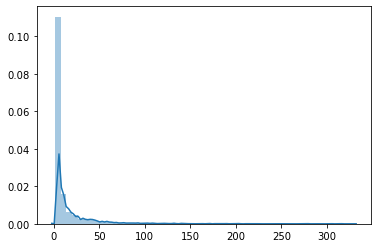

In [27]:
sns.distplot(movies_rating.groupby('title').size())
plt.show()

In [28]:
movies_rating.groupby('title').size().describe()

count    9719.000000
mean       10.374524
std        22.405799
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
dtype: float64

In [29]:
vote_count = movies_rating.groupby('movieId').size()
vote_count.name = 'vote_count'

In [30]:
vote_count

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: vote_count, Length: 9719, dtype: int64

In [31]:
movies = movies.merge(vote_count, on='movieId', how='left')

In [32]:
movies.to_csv('./datasets/movies-with-rating-and-vote-count.csv', index=False)

In [60]:
movies

movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                                          Comedy  
...                                           ...  
9737              Action|Animation|Comedy|Fantasy  
9738                     Animation|Comedy|Fantasy  
9739                                        Drama  
9740                             Action|Animation  
9741                                       Comedy  

[9742 rows x 3 columns]

In [34]:
top_rated_movies = movies[movies.vote_count >= 10]

In [35]:
top_rated_movies

movieId                               title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
4           5  Father of the Bride Part II (1995)   
5           6                         Heat (1995)   
...       ...                                 ...   
9566   174055                      Dunkirk (2017)   
9599   176371            Blade Runner 2049 (2017)   
9616   177765                         Coco (2017)   
9640   179819     Star Wars: The Last Jedi (2017)   
9704   187593                   Deadpool 2 (2018)   

                                           genres  average_rating  vote_count  
0     Adventure|Animation|Children|Comedy|Fantasy        3.920930       215.0  
1                      Adventure|Children|Fantasy        3.431818       110.0  
2                                  Comedy|Romance        3.259615        52.0  
4                                          Comedy        3.071429        49.0  
5                           Action|Crime|Thriller        3.946078       102.0  
...                                           ...             ...         ...  
9566                    Action|Drama|Thriller|War        3.423077        13.0  
9599                                       Sci-Fi        3.805556        18.0  
9616                 Adventure|Animation|Children        3.538462        13.0  
9640              Action|Adventure|Fantasy|Sci-Fi        3.125000        12.0  
9704                         Action|Comedy|Sci-Fi        3.875000        12.0  

[2269 rows x 5 columns]

In [36]:
top_rated_movies.sort_values(by='average_rating', ascending=False)

movieId                                       title  \
796      1041                       Secrets & Lies (1996)   
2582     3451         Guess Who's Coming to Dinner (1967)   
883      1178                       Paths of Glory (1957)   
841      1104            Streetcar Named Desire, A (1951)   
1762     2360            Celebration, The (Festen) (1998)   
...       ...                                         ...   
2683     3593                    Battlefield Earth (2000)   
2662     3564  Flintstones in Viva Rock Vegas, The (2000)   
1173     1556              Speed 2: Cruise Control (1997)   
2104     2798                        Problem Child (1990)   
1312     1760                          Spice World (1997)   

                       genres  average_rating  vote_count  
796                     Drama        4.590909        11.0  
2582                    Drama        4.545455        11.0  
883                 Drama|War        4.541667        12.0  
841                     Drama        4.475000        20.0  
1762                    Drama        4.458333        12.0  
...                       ...             ...         ...  
2683            Action|Sci-Fi        1.657895        19.0  
2662          Children|Comedy        1.625000        12.0  
1173  Action|Romance|Thriller        1.605263        19.0  
2104          Children|Comedy        1.583333        12.0  
1312                   Comedy        1.350000        10.0  

[2269 rows x 5 columns]

In [61]:
top_rated_movies.sort_values(by='vote_count', ascending=False)

movieId                                              title  \
314       356                                Forrest Gump (1994)   
277       318                   Shawshank Redemption, The (1994)   
257       296                                Pulp Fiction (1994)   
510       593                   Silence of the Lambs, The (1991)   
1939     2571                                 Matrix, The (1999)   
...       ...                                                ...   
3808     5329                             Salton Sea, The (2002)   
3787     5296                         Sweetest Thing, The (2002)   
7029    68793  Night at the Museum: Battle of the Smithsonian...   
8158   102481                             Internship, The (2013)   
6217    45668                             Lake House, The (2006)   

                           genres  average_rating  vote_count  
314      Comedy|Drama|Romance|War        4.164134       329.0  
277                   Crime|Drama        4.429022       317.0  
257   Comedy|Crime|Drama|Thriller        4.197068       307.0  
510         Crime|Horror|Thriller        4.161290       279.0  
1939       Action|Sci-Fi|Thriller        4.192446       278.0  
...                           ...             ...         ...  
3808         Crime|Drama|Thriller        3.350000        10.0  
3787               Comedy|Romance        2.900000        10.0  
7029           Action|Comedy|IMAX        3.100000        10.0  
8158                       Comedy        3.550000        10.0  
6217        Drama|Fantasy|Romance        3.100000        10.0  

[2269 rows x 5 columns]

In [64]:
2269 / (1/4.164134) + (1/329)

9448.423085513678

In [37]:
movie_recommendation_for_new_users = top_rated_movies.sort_values(by='vote_count', ascending=False)

In [62]:
movie_recommendation_for_new_users.iloc[:10].title

314                           Forrest Gump (1994)
277              Shawshank Redemption, The (1994)
257                           Pulp Fiction (1994)
510              Silence of the Lambs, The (1991)
1939                           Matrix, The (1999)
224     Star Wars: Episode IV - A New Hope (1977)
418                          Jurassic Park (1993)
97                              Braveheart (1995)
507             Terminator 2: Judgment Day (1991)
461                       Schindler's List (1993)
Name: title, dtype: object